In [525]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import string
import  re

In [526]:
df = pd.read_csv('twitter_training.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [527]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [528]:
print(df.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [529]:
if 'comments' not in df.columns:
    df['comments'] = ''


In [530]:

# Check for the 'comments' column
if 'comments' in df.columns:
    # Clean the text in the 'comments' column
    df['comments'] = df['comments'].str.replace("[^a-zA-Z#]", " ")
else:
    print("The 'comments' column is missing in the DataFrame. Please check the data source.")


In [531]:
df['comments'] = df['comments'].str.replace("[^a-zA-Z#]", " ")
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,


In [532]:
df['comments'] = df['comments'].astype(str)


In [533]:
df['comments'] = df['comments'].fillna('')


In [534]:
tokenized_tweets = df['comments'].apply(lambda x: x.split())


In [535]:
tokenized_tweets.head()

0    []
1    []
2    []
3    []
4    []
Name: comments, dtype: object

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
 4   comments                                               74681 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [537]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
comments                                                   0
dtype: int64

In [538]:
df.duplicated().sum()

np.int64(2700)

In [539]:
print(df.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', 'comments'],
      dtype='object')


In [540]:
import nltk

emotions
happy      2
sad        1
neutral    1
angry      1
Name: count, dtype: int64


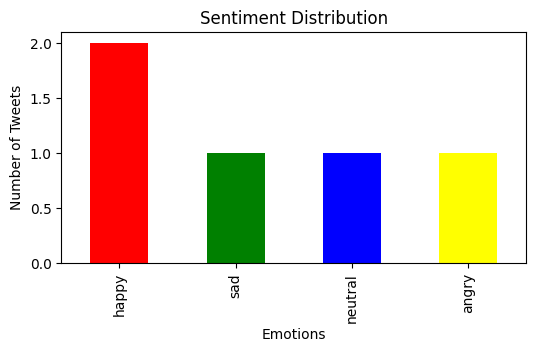

In [541]:

data = {'Positive': ['happy', 'sad', 'neutral', 'happy', 'angry']}
df = pd.DataFrame(data)

df.rename(columns={"Positive": "emotions"}, inplace=True)

sentiment_counts = df['emotions'].value_counts()
print(sentiment_counts)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Tweets')
plt.xlabel('Emotions')
plt.show()


In [542]:
import pandas as pd

# Sample DataFrame
data = {
    "Entity": ["Microsoft", "Google", "Microsoft", "Apple", "Microsoft"],
    "Sentiments": ["Positive", "Negative", "Neutral", "Positive", "Negative"],
}
df = pd.DataFrame(data)

# Filter and count
brand_data = df[df["Entity"].str.contains("Microsoft", case=False)]
brand_sentiment_counts = brand_data["Sentiments"].value_counts()
print(brand_sentiment_counts)


Sentiments
Positive    1
Neutral     1
Negative    1
Name: count, dtype: int64


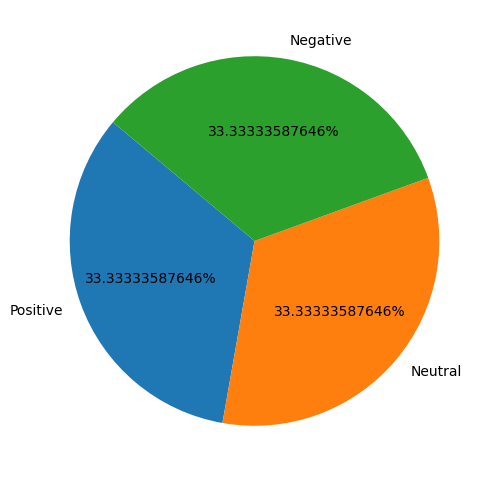

In [543]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.11f%%', startangle=140) 
plt.show()